# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**KENECHUKWU, OZOJIE**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
The following libraries will be imported and used in the course of this predict:

<b>Numpy:</b> Used for mathematical computations on the data.

<b>Pandas:</b> Can be used for data manipulation, visualisation, normalization etc.

<b>Matplotlib:</b> Used for data visualization.

<b>Seaborn:</b> Built upon matplotlib; used for more customizable data visualizations.

<b>Sklearn:</b> Used for Machine learning operations.

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = 100

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---    
In this section, we will load the `df_train.csv` and `df_test.csv` files in a Pandas DataFrame.


We will do this with the help of pandas' <b>`read_csv()`</b> method.

---

In [196]:
# Loading the data
df_train = pd.read_csv('Advanced-Regression-Starter-Data/df_train.csv')
df_test = pd.read_csv('Advanced-Regression-Starter-Data/df_test.csv')

# Viewing a sample of the loaded dfs
display(df_train.sample(3))
display(df_test.sample(3))

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
7443,7443,2017-07-20 00:00:00,4.000000,level_1,0.1,0.333333,69.000000,28.666667,80.666667,0.666667,...,301.15,298.65,291.150000,291.586667,298.15,292.150000,296.483333,299.200000,297.483333,18844.000000
6429,6429,2017-03-15 06:00:00,1.666667,level_4,0.0,1.000000,93.000000,76.666667,80.000000,0.000000,...,280.15,281.15,279.816667,281.796667,279.15,284.150000,282.150000,278.883333,278.150000,3613.666667
7676,7676,2017-08-18 03:00:00,1.333333,level_1,0.0,0.666667,67.666667,39.333333,8.000000,0.666667,...,297.15,296.15,289.816667,290.560000,295.15,291.483333,296.150000,296.960000,296.816667,13681.666667


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
1261,10024,2018-06-07 15:00:00,4.666667,level_5,0.0,5.333333,46.000000,43.333333,40.000000,4.333333,...,294.150000,297.150000,293.190000,293.816667,294.120000,292.150000,294.483333,296.816667,295.646667,293.15
339,9102,2018-02-12 09:00:00,1.000000,level_4,0.1,2.000000,85.333333,76.000000,63.333333,1.000000,...,283.483333,280.150000,282.806667,275.150000,276.220000,282.150000,277.816667,284.816667,278.913333,276.15
1691,10454,2018-07-31 09:00:00,1.666667,level_1,0.0,0.333333,60.666667,37.666667,75.000000,0.666667,...,301.816667,298.816667,300.816667,291.483333,292.673333,299.816667,294.150000,295.483333,296.643333,295.15


In [197]:
df_train['Valencia_wind_deg'].unique()

array(['level_5', 'level_10', 'level_9', 'level_8', 'level_7', 'level_6',
       'level_4', 'level_3', 'level_1', 'level_2'], dtype=object)

In [198]:
df_train['Seville_pressure'].unique()

array(['sp25', 'sp23', 'sp24', 'sp21', 'sp16', 'sp9', 'sp15', 'sp19',
       'sp22', 'sp11', 'sp8', 'sp4', 'sp6', 'sp13', 'sp17', 'sp20',
       'sp18', 'sp14', 'sp12', 'sp5', 'sp10', 'sp7', 'sp3', 'sp2', 'sp1'],
      dtype=object)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
In this section, we will be doing an in-depth analysis of the DataFrame.


---
### Getting to know the DataFrame:

---


In [4]:
# Showing the columns
print("Column Names:", str(df_train.columns))

Column Names: Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_t

In [5]:
# Number of rows and columns
print("Number of (rows/cols):", str(df_train.shape[0]) + ' rows/ ' + str(df_train.shape[1]) + ' columns')

Number of (rows/cols): 8763 rows/ 49 columns


In [6]:
# The data type of each column
df_train.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

Here we can see that the dataset contains 3 `object-type` features, and they need to be dealt with later on as we only need numerical features for our data modelling.

In [7]:
# Checking for null values
df_train.isna().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

Here we can see that the `Valencia_pressure` feature is the only one that contains null values, and it's huge, so it needs to be dealt with during data cleaning

---
### Statistical Analysis:

---


`df.describe()` will be used to get the count, mean, standard deviation and a five number summary of each numerical feature.

The five number summary include: (Minimum, Lower Quartile (Q1) = 25%, Median (Q2) = 50%, Upper Quartile (Q3) = 75%, Maximum).


In [8]:
# look at data statistics
description = df_train.describe().T
description.style.background_gradient(cmap = 'BrBG')

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.000000,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8762.000000
Madrid_wind_speed,8763.000000,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,13.000000
Bilbao_rain_1h,8763.000000,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000
Valencia_wind_speed,8763.000000,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,52.000000
Seville_humidity,8763.000000,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,100.000000
Madrid_humidity,8763.000000,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,100.000000
Bilbao_clouds_all,8763.000000,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,100.000000
Bilbao_wind_speed,8763.000000,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,12.666667
Seville_clouds_all,8763.000000,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,97.333333
Bilbao_wind_deg,8763.000000,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,359.333333



`df.describe()` can also be used to get some statistical values from object-type features. Specifying the arguement: `include` = `'O'` which stands for object,
gives us a result which will include `count`, `unique`, `top`, and `freq`.

The `unique` is the number of unique values in the feature.

The `top` is the most common value.

The `freq` is the most common value’s frequency.

Timestamps also include the first and last items.

In [9]:
# check statistics on object-type features
df_train.describe(include='O')

,time,Valencia_wind_deg,Seville_pressure
count,8763,8763,8763
unique,8763,10,25
top,2015-01-01 03:00:00,level_1,sp13
freq,1,1072,500


---
`df.kurtosis()` will be used to measure outliers present in the data.

**High kurtosis (>3)** indicates a large number of outliers and **low kurtosis (<3)** a lack of outliers.

Looking at the output below, we can easily see that the `Valencia_snow_3h` and `Barcelona_pressure` columns contain insane amounts of outliers.

In [10]:
# checking the kurtosis of the df
df_train.kurtosis(numeric_only = True)

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

---
`df.skew()` will be used to indicate how symmetrical the data is.

Below is a description of the range of values with regards to skew:


<b>(-0.5 < x < 0.5)</b> :: Fairly Symmetrical

<b>(-1 < x < -0.5)</b> :: Moderate Negative Skew

<b>(0.5 < x < 1)</b> :: Moderate Positive Skew

<b>(x < -1)</b> :: High Negative Skew

<b>(x > 1)</b> :: High Positve Skew

Looking at the output below, we can observe that the `Madrid_pressure` feature has a high negative skew, while the  `Barcelona_pressure` feature has a high positive skew.

In [11]:
# Checking the skew of the df
df_train.skew(numeric_only = True)

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

---
### Data Visualisations:

---

Let's explore the distribution of wind speed in each city. We shall use `Matplotlib's` `hist()` function to render all the distributions at once.

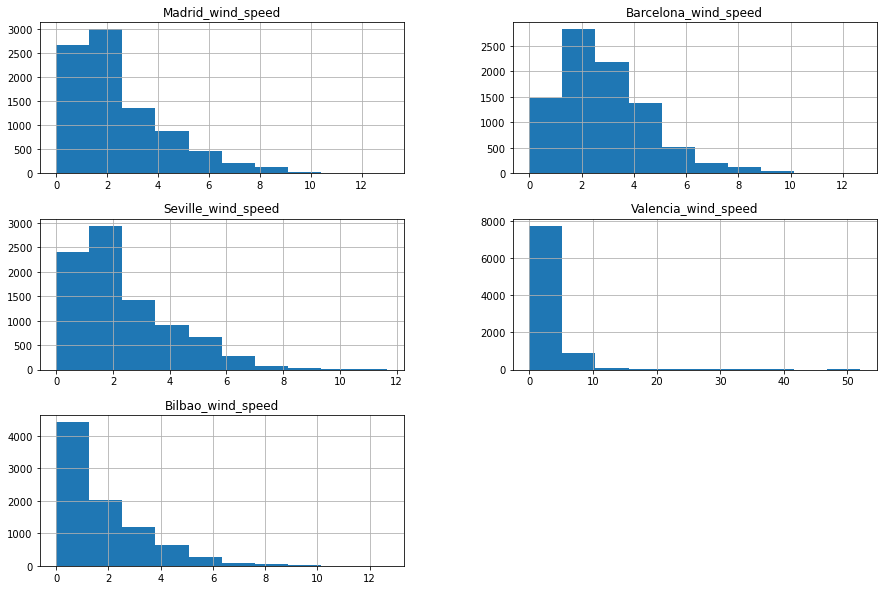

In [12]:
# create a variable for the wind speed features
wind_features = ['Madrid_wind_speed','Barcelona_wind_speed','Seville_wind_speed','Valencia_wind_speed','Bilbao_wind_speed']

# plot the variable
df_train[wind_features].hist(figsize=(15,10))
plt.show()

Here we can observe that the <b>distribution</b> of wind-speed is very similar across all cities. We can also see that it mostly falls between 0 to 2.

---

Now, let's look at the <b>`correlation matrix`</b> of the data to see how the features relate to each other.

In [13]:
# evaluate correlation
correlation = df_train.corr()
correlation.style.background_gradient(cmap = 'BrBG')

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,-0.218781,-0.140449,-0.116928,-0.093926,-0.075692,-0.075340,-0.092377,-0.040157,-0.082525,-0.068980,-0.104326,-0.028130,0.047202,0.034761,-0.022475,0.072472,0.267772,0.039424,0.385578,0.087002,0.135294,0.192485,0.042897,0.023917,0.185468,0.047417,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.157088,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.206765,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.041408,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.088094,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.168207,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.079778,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.37785

One of the things that can be seen from this matrix is that the `Madrid_pressure` feature has a strong positive correlation with the `Valencia_pressure` feature

but has a strong negative correlation with the `Barcelona_pressure` feature.

---

Let us inspect the `Valencia_pressure` feature, so as to know how to handle the `null` values.

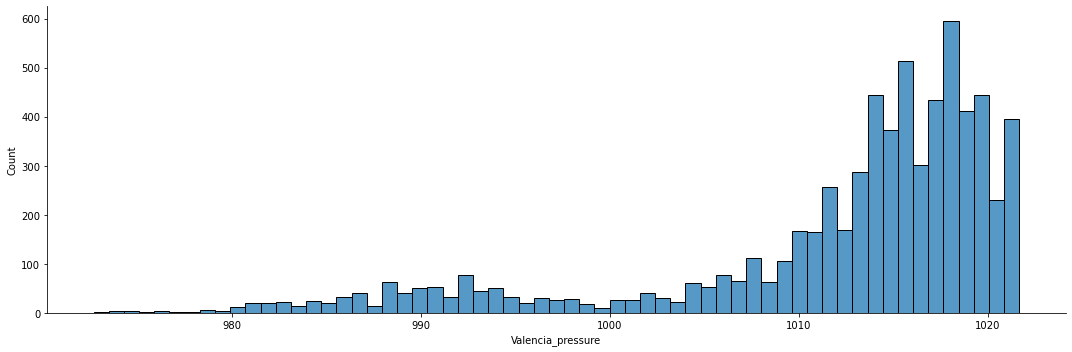

In [14]:
# looking at the distribution of Valencia_pressure
sns.displot(data= df_train['Valencia_pressure'], aspect= 3)

With this plot, we can easily see that it is `skewed left` and most of the values fall between `1010` and `1020`.

Using the `Mode` to fill the null values will be a good idea.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [199]:
# remove/fill missing values/ features
clean_train_df = df_train.copy()
clean_train_df['Valencia_pressure'] = clean_train_df['Valencia_pressure'].fillna(clean_train_df['Valencia_pressure'].mode()[0])

clean_test_df = df_test.copy()
clean_test_df['Valencia_pressure'] = clean_test_df['Valencia_pressure'].fillna(clean_test_df['Valencia_pressure'].mode()[0])

In [200]:
# function to process time column
def process_date(input_df):
    output_df = input_df.copy()
    output_df['time'] = pd.to_datetime(output_df['time'])
    output_df['year'] = pd.DatetimeIndex(output_df['time']).year
    output_df['month'] = pd.DatetimeIndex(output_df['time']).month
    output_df['day'] = pd.DatetimeIndex(output_df['time']).day
    output_df['hour'] = pd.DatetimeIndex(output_df['time']).hour

    return output_df

In [201]:
# process time column
clean_train_df = process_date(clean_train_df)

clean_test_df = process_date(clean_test_df)

In [202]:
# drop unnamed column
clean_train_df = clean_train_df.drop(['Unnamed: 0'], axis = 1)

clean_test_df = clean_test_df.drop(['Unnamed: 0'], axis = 1)

In [203]:
# function that drops non-numerical columns
def drop_col(input_df):
    output_df = input_df.copy()
    for column in output_df:
        if output_df[column].dtype not in ('int64','float64'):
            output_df = output_df.drop(column, axis= 1)

    return output_df

In [204]:
# drop non-numerical columns
clean_train = drop_col(clean_train_df)
clean_test = drop_col(clean_test_df)

In [205]:
clean_train.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,day,hour
0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3
1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6
2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,...,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9
3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,...,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,12
4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,...,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,15


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [206]:
# create targets and features dataset
y = clean_train['load_shortfall_3h']
X = clean_train.drop('load_shortfall_3h', axis = 1)

In [207]:
# split the train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [208]:
# model object
lm = LinearRegression()

In [209]:
# train model
lm.fit(X_train, y_train)

LinearRegression()

In [210]:
# make predictions
validation = lm.predict(X_test)

In [211]:
# RMSE
rmse = mean_squared_error(y_test, validation, squared = False)

print("Base model RMSE = {}". format(rmse))

Base model RMSE = 4778.595281871979


In [ ]:
# create one or more ML models


# Using Decision Tree

In [212]:
# evaluate one or more ML models
regr_tree = DecisionTreeRegressor(max_depth=10,random_state=40)

# fit the model
regr_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=40)

In [213]:
# get predictions for test data
y_pred = regr_tree.predict(X_test)

# calculate MSE
MSE = mean_squared_error(y_pred,y_test)

# Report RMSE
print("Regression Decision Tree model RMSE is:",np.sqrt(MSE))

Regression Decision Tree model RMSE is: 3970.064503183507


# Using Random Forests

In [214]:
# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=10)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=10)

In [215]:
# Get predictions
y_pred = RF.predict(X_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 3303.3381393886675


# Saving the Predictions for Submission

In [216]:
# Fit the model using the whole training dataset
RF.fit(X, y)

RandomForestRegressor(max_depth=10)

In [217]:
# Make prediction for the target variable
predictions = RF.predict(clean_test)

In [218]:
# Store predictions in a dataframe
load_shortfall = pd.DataFrame(predictions, columns = ['load_shortfall_3h'])

# A preview of our dataframe
load_shortfall.head()

,load_shortfall_3h
0,9460.822666
1,7664.042789
2,6895.579832
3,10072.236452
4,11557.954534


In [181]:
# Get Time variable as a dataframe
time = pd.DataFrame({'time': df_test['time']})

# Combine Time DataFrame with the Load_shortfall dataframe
submission = time.join(load_shortfall)

# Write to the result to a csv file
submission.to_csv('RF_submission.csv', index = False)


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic